In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive

drive.mount('/content/drive')

from scipy.io import loadmat

data = loadmat('/content/drive/MyDrive/Colab Notebooks/X1.mat')
dt = data['X1']

Mounted at /content/drive


In [3]:
dt = pd.DataFrame(dt)
dt.columns = ['x1', 'x_d1', 'alpha1','alpha_d1', 'voltage','time']
print(dt)

                  x1          x_d1    alpha1  alpha_d1    voltage  \
0       0.000000e+00  0.000000e+00  0.087266  0.000000  13.737170   
1       1.092909e-15  1.038168e-07  0.087266  0.000001  13.731268   
2       3.934225e-14  6.228419e-07  0.087266  0.000008  13.701798   
3       1.049889e-12  3.216497e-06  0.087266  0.000040  13.555479   
4       2.654519e-11  1.614808e-05  0.087266  0.000199  12.849086   
...              ...           ...       ...       ...        ...   
138250 -6.597897e-02 -4.700952e-04  3.141504  0.021431  -0.001540   
138251 -6.597904e-02 -4.698765e-04  3.141507  0.021431  -0.000732   
138252 -6.597912e-02 -4.696278e-04  3.141511  0.021430   0.005014   
138253 -6.597918e-02 -4.694490e-04  3.141513  0.021430   0.000602   
138254 -6.597924e-02 -4.692669e-04  3.141516  0.021429  -0.001263   

                time  
0       0.000000e+00  
1       2.105444e-08  
2       1.263267e-07  
3       6.526877e-07  
4       3.284493e-06  
...              ...  
138250  1.

In [4]:
X = dt.iloc[:,0:4] #only training on the first 4 columns
print(X)

                  x1          x_d1    alpha1  alpha_d1
0       0.000000e+00  0.000000e+00  0.087266  0.000000
1       1.092909e-15  1.038168e-07  0.087266  0.000001
2       3.934225e-14  6.228419e-07  0.087266  0.000008
3       1.049889e-12  3.216497e-06  0.087266  0.000040
4       2.654519e-11  1.614808e-05  0.087266  0.000199
...              ...           ...       ...       ...
138250 -6.597897e-02 -4.700952e-04  3.141504  0.021431
138251 -6.597904e-02 -4.698765e-04  3.141507  0.021431
138252 -6.597912e-02 -4.696278e-04  3.141511  0.021430
138253 -6.597918e-02 -4.694490e-04  3.141513  0.021430
138254 -6.597924e-02 -4.692669e-04  3.141516  0.021429

[138255 rows x 4 columns]


In [5]:
y = dt.iloc[:,4]
print(y)

0         13.737170
1         13.731268
2         13.701798
3         13.555479
4         12.849086
            ...    
138250    -0.001540
138251    -0.000732
138252     0.005014
138253     0.000602
138254    -0.001263
Name: voltage, Length: 138255, dtype: float64


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.3,
    train_size=0.7,
    random_state=127,
    shuffle=True)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(96778, 4)
(41477, 4)
(96778,)
(41477,)


In [9]:
import tensorflow as tf
from tensorflow import keras
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from tensorflow.python.keras.optimizers import *
import numpy as np

model = Sequential()
model.add(Dense(2, input_dim=4, activation='tanh'))
model.add(Dense(4, activation='tanh'))
model.add(Dense(6, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(6, activation='tanh'))
model.add(Dense(1, activation='linear'))

optim = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optim, metrics=['mse'])

history = model.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X, y))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1513/1513 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1619 - mse: 0.1619 - val_loss: 0.1427 - val_mse: 0.1427
Epoch 2/25
1513/1513 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.1475 - mse: 0.1475 - val_loss: 0.1241 - val_mse: 0.1241
Epoch 3/25
1513/1513 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.1214 - mse: 0.1214 - val_loss: 0.1037 - val_mse: 0.1037
Epoch 4/25
1513/1513 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.1011 - mse: 0.1011 - val_loss: 0.0869 - val_mse: 0.0869
Epoch 5/25
1513/1513 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0848 - mse: 0.0848 - val_loss: 0.0755 - val_mse: 0.0755
Epoch 6/25
1513/1513 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0729 - mse: 0.0729 - val_loss: 0.0687 - val_mse: 0.0687
Epoch 7/25
1513/1513 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0748 - mse: 0.0748 - val_loss: 0.0640 - val_mse: 0.0640
Epoch 8/25
1513/1513 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0641 - mse: 0.0641 - val_loss: 0.0613 - val_mse: 0.0613
Epoch 9/25
1513/1513 ━━━━━━━━━━━━━━━

In [10]:
y_pred = model.predict(X_test)

1297/1297 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


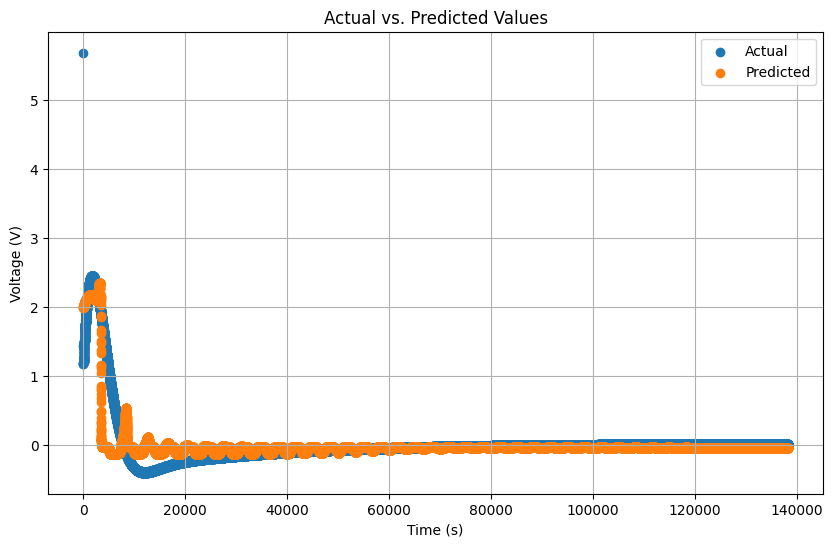

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.scatter(y_test.index, y_test.values, label='Actual')  # Scatter plot for actual values
plt.scatter(y_test.index, y_pred, label='Predicted')  # Scatter plot for predicted values
plt.xlabel('Time (s)')  # Set x-axis label
plt.ylabel('Voltage (V)')  # Set y-axis label
plt.title('Actual vs. Predicted Values')  # Set plot title
plt.legend()  # Show legend
plt.grid(True)  # Add gridlines for better visualization
plt.show()  # Display the plot

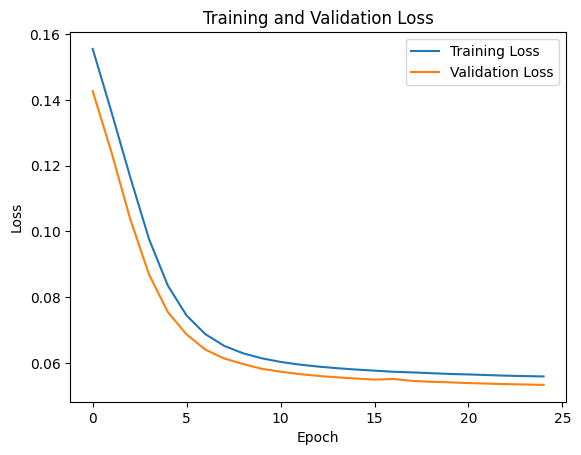

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.7146426517496538


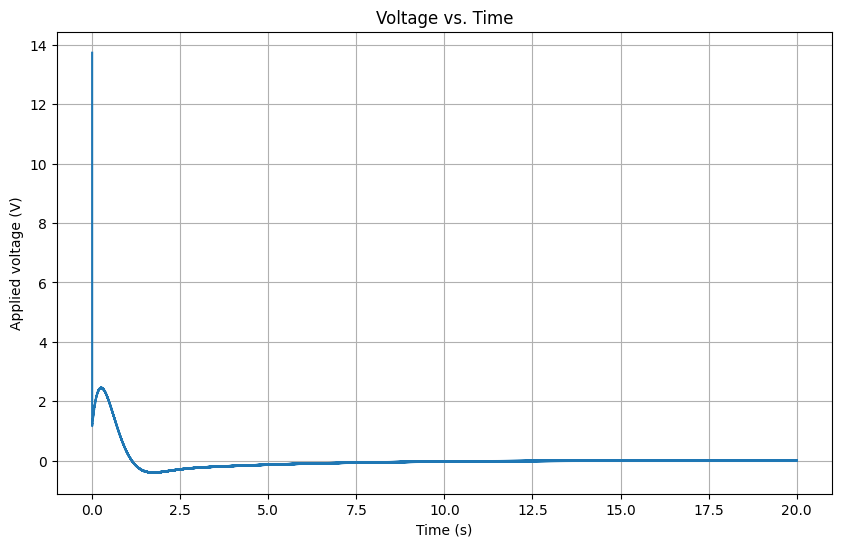

In [14]:
import matplotlib.pyplot as plt

x_col = dt.columns[5]
y_col = dt.columns[4]

# Create the plot
plt.figure(figsize=(10, 6))  # Set figure size
plt.plot(dt[x_col], dt[y_col])
plt.xlabel('Time (s)')  # Set x-axis label
plt.ylabel('Applied voltage (V)')  # Set y-axis label
plt.title('Voltage vs. Time')  # Set plot title
plt.grid(True)  # Add gridlines for better visualization
plt.show()  # Display the plot